In [ ]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split

import statistics
import sklearn.utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randint
import math
from sklearn import metrics
%matplotlib inline

## <h2><center>Creat a MLP Neural Network</center></h2> 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class MLP_1:
    
    def __init__(self,weights_hidden_output, weights_input_hidden,epochs,lr):
        self.weights_hidden_output = weights_hidden_output
        self.weights_input_hidden = weights_input_hidden
        self.epochs = epochs
        self.lr = lr

    def train(self,X,y):
        epoch_List = []
        losses_List = []
        for epoch in range(self.epochs):
            ## Forward Propogation

            #calculating hidden layer activations
            hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
            hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

            #calculating the output
            outputLayer_linearTransform = np.dot(
                weights_hidden_output.T, hiddenLayer_activations
            )
            output = sigmoid(outputLayer_linearTransform)

            ## Backward Propagation
            #calculating error
            error = np.square(y - output) / 2

            #calculating rate of change of error w.r.t weight between hidden and output layer
            error_wrt_output = -(y - output)
            output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
            outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

            error_wrt_weights_hidden_output = np.dot(
                outputLayer_LinearTransform_wrt_weights_hidden_output,
                (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
            )

            #calculating rate of change of error w.r.t weights between input and hidden layer
            outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
                hiddenLayer_activations, (1 - hiddenLayer_activations)
            )
            hiddenLayer_linearTransform_wrt_weights_input_hidden = X
            error_wrt_weights_input_hidden = np.dot(
                hiddenLayer_linearTransform_wrt_weights_input_hidden,
                (
                    hiddenLayer_activations_wrt_hiddenLayer_linearTransform
                    * np.dot(
                        outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                       (output_wrt_outputLayer_LinearTransform * error_wrt_output),
                   )
                ).T,
            )

            #updating the weights
            self.weights_hidden_output += - (lr * error_wrt_weights_hidden_output)
            self.weights_input_hidden  +=  - (lr * error_wrt_weights_input_hidden)
    

            #print error at every 200th epoch
            epoch_loss = np.average(error)
            if epoch % 200 == 0:
                print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

            #appending the error of each epoch
            losses_List.append(epoch_loss)
            epoch_List.append(epoch)
    
        return epoch_List,losses_List
    
    def predict(self,X_test):
        hidden_input = X_test.dot(self.weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output_layer_input = hidden_output.dot(self.weights_hidden_output)
        y_pred = sigmoid(output_layer_input);
        return y_pred
        

## <h2><center>MLP With XOR dataset</center></h2>

In [ ]:
#Load trainin data
dataset = pd.read_csv('./sample_data/XOR.csv')
y= dataset.pop('Output').values
X = dataset.values

np.random.seed(42)

X = X.T
y = y.T

In [ ]:
#Defining the model architecture
inputLayer_neurons = 2 # X.shape[0]  number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1 #y.shape[0]  number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)


# defining the parameters
lr = 0.1
epochs = 6000

In [ ]:
#Creat a model
nn = MLP_1(weights_hidden_output, weights_input_hidden,epochs,lr)

In [ ]:
#Train the model
xor_error,xor_losses=nn.train(X,y)

Error at epoch 0 is 0.14892
Error at epoch 200 is 0.12508
Error at epoch 400 is 0.12501
Error at epoch 600 is 0.12494
Error at epoch 800 is 0.12486
Error at epoch 1000 is 0.12476
Error at epoch 1200 is 0.12462
Error at epoch 1400 is 0.12441
Error at epoch 1600 is 0.12407
Error at epoch 1800 is 0.12350
Error at epoch 2000 is 0.12253
Error at epoch 2200 is 0.12092
Error at epoch 2400 is 0.11840
Error at epoch 2600 is 0.11485
Error at epoch 2800 is 0.11035
Error at epoch 3000 is 0.10516
Error at epoch 3200 is 0.09958
Error at epoch 3400 is 0.09374
Error at epoch 3600 is 0.08760
Error at epoch 3800 is 0.08088
Error at epoch 4000 is 0.07306
Error at epoch 4200 is 0.06375
Error at epoch 4400 is 0.05343
Error at epoch 4600 is 0.04349
Error at epoch 4800 is 0.03516
Error at epoch 5000 is 0.02872
Error at epoch 5200 is 0.02389
Error at epoch 5400 is 0.02026
Error at epoch 5600 is 0.01749
Error at epoch 5800 is 0.01534


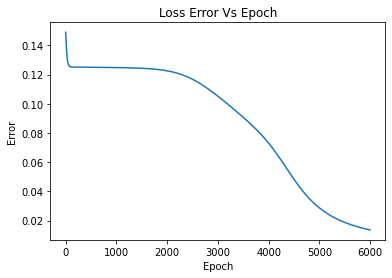

In [ ]:
#Display a Graph of the Error Loss Vs The Epochs For The XOR Data set
plt.plot(xor_error,xor_losses )
plt.title('Loss Error Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [ ]:
#Load XOR test data
dataset = pd.read_csv('./sample_data/XOR.csv')
y= dataset.pop('Output').values
X_test = dataset.values

In [ ]:
#Make prediction on the XOR test data set
y_pred_1 = nn.predict(X_test)

In [ ]:
#Print the accuracy
pred_list = []
for r in y_pred_1:
     pred_list.append((sum(r)/len(r)))
#print(pred_list)
final_pred = [round(pred_list) for pred_list in pred_list]
accuracy = np.sum(y == final_pred, axis=0) / len(y)
print(y)
print(final_pred)
print ("Accuracy:", accuracy*100)

[0 1 0 1]
[0, 1, 0, 1]
Accuracy: 100.0


In [ ]:
#Print the perfomance Matrix
print(metrics.classification_report(y, final_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



# <h2><center>MLP With random generated values for Sine dataset</center></h2>

In [ ]:
#Create a dataset
seed(1)
sin_test_numRow =500
#data Frame columns/features
input_1 = []
input_2 = []
input_3 = []
input_4 = []
labels = []
for i in range(sin_test_numRow):
    randList= randint(-1, 1, 4)
    total = randList[0]-randList[1]+randList[2]-randList[3]
    #output = round(math.sin(total))
    output = math.sin(total)
    input_1.append(randList[0])
    input_2.append(randList[1])
    input_3.append(randList[2])
    input_4.append(randList[3])
    labels.append(output)
#Create a dataframe and print the df to see what the raw df looks like.
d = {'input_1': input_1, 'input_2': input_2,'input_3': input_3, 'input_4': input_4,'labels': labels}
df = pd.DataFrame(data=d)
df
#Save the df as a CSV
df.to_csv('random.csv',  index=False)

In [ ]:
#Load the data
dataset = pd.read_csv('./sample_data/random.csv')
y = dataset.pop('labels').values
X = dataset.values

uniqueLables = list(set(y))

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
np.random.seed(42)
X_train_T = X_train.T
y_train_T = y_train.T

In [ ]:
#Defining the model architecture
inputLayer_neurons = 4 #X_train_t.shape[0]  # number of features in data set
hiddenLayer_neurons = 8  # number of hidden layers neurons
outputLayer_neurons = 1 #y_train_t.shape[0]  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.02
epochs = 3000

In [ ]:
#Creat a model
nn = MLP_1(weights_hidden_output, weights_input_hidden,epochs,lr)

In [ ]:
#Train the model
sine_error,sine_losses=nn.train(X_train_T,y_train_T)

Error at epoch 0 is 0.51344
Error at epoch 200 is 0.11305
Error at epoch 400 is 0.11273
Error at epoch 600 is 0.11265
Error at epoch 800 is 0.11262
Error at epoch 1000 is 0.11260
Error at epoch 1200 is 0.11259
Error at epoch 1400 is 0.11258
Error at epoch 1600 is 0.11257
Error at epoch 1800 is 0.11257
Error at epoch 2000 is 0.11256
Error at epoch 2200 is 0.11256
Error at epoch 2400 is 0.11256
Error at epoch 2600 is 0.11255
Error at epoch 2800 is 0.11255


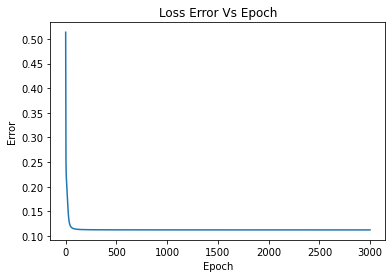

In [ ]:
plt.plot(sine_error,sine_losses )
plt.title('Loss Error Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [ ]:
#Make prediction on the Sine test data set
y_pred = nn.predict(X_test)

In [ ]:
#Print the accuracy
pred_list = []
for r in y_pred:
     pred_list.append((sum(r)/len(r)))
#print(pred_list)
final_pred = [round(pred_list) for pred_list in pred_list]
accuracy = np.sum(y_test == final_pred, axis=0) / len(y_test)
print ("Accuracy:", accuracy*100)

Accuracy: 39.0


### <h1><center>MLP with Letter Recognition Dataset</center></h1>

In [ ]:
#Adapted from https://github.com/cuongphamduc/Letter-Recognition-Using-Multi-layer-Perceptron/blob/master/MLP.py
epochList = []
lossList = []

def to_one_hot(vector, dimension=26):
    res = np.zeros((len(vector), dimension))

    for index, value in enumerate(vector):
        res[index, ord(value) - ord('A')] = 1.

    return res


def softmax(arr):
    arr_e = np.exp(arr - np.max(arr, axis=0, keepdims=True))
    res = arr_e / arr_e.sum(axis=0)

    return res


def cross_entropy_loss(y, y_pre):
    return -np.sum(y * np.log(y_pre)) / y.shape[1]


class MLP:
    def __init__(self, d0, d1, d2, learning_rate, batch_size, num_epochs):
        self.W1 = 0.01 * np.random.randn(d0, d1)
        # W1 = (16, 100)
        self.b1 = np.zeros((d1, 1))
        # b1 = (100, 1)
        self.W2 = 0.01 * np.random.randn(d1, d2)
        # W2 = (100, 26)
        self.b2 = np.zeros((d2, 1))
        # b2 = (26, 1)
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs

    def fit(self, X, y):
        N = X.shape[1]
        loss = []

        for epoch in range(self.num_epochs):
                tmp = []
                X = X.T
                # X = (16000, 16)
                y = y.T
                # y = (16000, 16)
        

                X, y = sklearn.utils.shuffle(X, y)

                X = X.T
                # X = (16, 16000)
                y = y.T
                # y = (26, 16000)

                for j in range(0, N, self.batch_size):
                    # Pick a mini-batch
                    X_batch = X[:, j: j + self.batch_size]
                    # X_batch = (16, 50)
                    y_batch = y[:, j: j + self.batch_size]
                    # y_batch = (26, 50)

                    # Feedforward
                    Z1 = np.dot(self.W1.T, X_batch) + self.b1
                    # Z1 = (100, 16) x (16, 50) + (100, 1) = (100, 50)
                    A1 = np.maximum(Z1, 0)
                    # A1 = (100, 50)
                    Z2 = np.dot(self.W2.T, A1) + self.b2
                    # Z2 = (26, 100) x (100, 50) + (26, 1) = (26, 50)
                    y_predict = softmax(Z2)
                    # y_predict = (26, 50)

                    tmp.append(cross_entropy_loss(y_batch, y_predict))

                    # Backpropagation
                    E2 = (y_predict - y_batch) / N
                    # E2 = (26, 50)
                    dW2 = np.dot(A1, E2.T)
                    # dW2 = (100, 50) x (50, 26) = (100, 26)
                    db2 = np.sum(E2, axis=1, keepdims=True)
                    # db2 = (26, 1)
                    E1 = np.dot(self.W2, E2)
                    # E1 = (100, 26) x (26, 50) = (100, 50)
                    E1[Z1 <= 0] = 0
                    # E1 = (100, 50)
                    dW1 = np.dot(X_batch, E1.T)
                    # dW1 = (16, 50) x (50, 100) = (16, 100)
                    db1 = np.sum(E1, axis=1, keepdims=True)
                    # db1 = (100, 1)

                    # Mini-batch gradient descent update
                    self.W1 += -self.learning_rate * dW1
                    # W1 = (16, 100)
                    self.b1 += -self.learning_rate * db1
                    # b1 = (100, 1)
                    self.W2 += -self.learning_rate * dW2
                    # W2 = (100, 26)
                    self.b2 += -self.learning_rate * db2
                    # b2 = (26, 1)

                loss.append(statistics.mean(tmp))
                epochList.append(epoch)
                lossList.append(loss[-1])
                if epoch % 100 == 0: 
                    print('Epoch %d, loss = %f' % (epoch + 1, loss[-1]))


    def predict(self, X):
        Z1 = np.dot(self.W1.T, X) + self.b1
        # Z1 = (100, 16) x (16, 4000) + (100, 1) = (100, 4000)
        A1 = np.maximum(Z1, 0)
        # A1 = (100, 4000)
        Z2 = np.dot(self.W2.T, A1) + self.b2
        # Z2 = (26, 100) x (100, 4000) + (26, 1) = (26, 4000)

        return np.argmax(Z2, axis=0)  # = (4000,)

In [ ]:
#Load Data
df = pd.read_csv('./sample_data/letter-recognition.csv', header=None)

label = df[0]
# label = (20000,)
feature = df.drop(0, axis=1)
# feature = (20000, 16)

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=97)
# X_train = (16000, 16), X_test  = (4000, 16),
# y_train = (16000,), y_test = (4000,)
X_train = np.asarray(X_train).T
# X = (16, 16000)
y_train = to_one_hot(y_train).T
  # y =(26, 16000)

In [ ]:
#Train Model
model = MLP(d0=16, d1=100, d2=26, learning_rate=1, batch_size=50, num_epochs=2000)

#Fit the model
model.fit(X_train, y_train)

Epoch 1, loss = 3.252983
Epoch 101, loss = 0.751200
Epoch 201, loss = 0.529970
Epoch 301, loss = 0.401264
Epoch 401, loss = 0.322742
Epoch 501, loss = 0.272257
Epoch 601, loss = 0.236685
Epoch 701, loss = 0.211564
Epoch 801, loss = 0.191551
Epoch 901, loss = 0.175707
Epoch 1001, loss = 0.161891
Epoch 1101, loss = 0.149753
Epoch 1201, loss = 0.140082
Epoch 1301, loss = 0.130290
Epoch 1401, loss = 0.123298
Epoch 1501, loss = 0.116601
Epoch 1601, loss = 0.109846
Epoch 1701, loss = 0.104586
Epoch 1801, loss = 0.099365
Epoch 1901, loss = 0.095095


### Display a Graph of the Error Loss Vs The Epochs For The Letter Recognition Data set

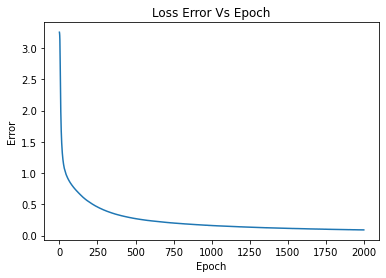

In [ ]:
plt.plot(epochList,lossList )
plt.title('Loss Error Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [ ]:
X_test = np.asarray(X_test).T
# X_test = (16, 4000)
predict = model.predict(X_test)
# predict = (4000,)

y_test = np.asarray(y_test)
# y_test = (4000,)

In [ ]:
#Print the accuracy
for ind, val in enumerate(y_test):
        y_test[ind] = ord(val) - ord('A')

print('Accuracy score: %.2f' % (np.mean(predict == y_test)))

Accuracy score: 0.95


Display Matrix Performance of the Model

In [ ]:
#convert y.test object to an array of int
y = y_test.astype(int)
print(metrics.classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       150
           1       0.94      0.92      0.93       162
           2       0.91      0.98      0.95       142
           3       0.94      0.92      0.93       156
           4       0.88      0.95      0.91       150
           5       0.95      0.93      0.94       162
           6       0.93      0.88      0.91       159
           7       0.83      0.93      0.88       139
           8       0.93      0.94      0.93       142
           9       0.95      0.93      0.94       158
          10       0.93      0.90      0.92       155
          11       0.97      0.95      0.96       152
          12       0.96      0.96      0.96       172
          13       0.98      0.95      0.96       168
          14       0.96      1.00      0.98       140
          15       0.96      0.94      0.95       167
          16       0.95      0.94      0.94       148
          17       0.92    